In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start': '1',
    'limit': '15', # limits the number of coins displayed
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '4e724473-916b-44ec-920f-23146ebaab30',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2025-08-17T15:03:10.731Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 9495}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12285, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [5]:
pd.set_option('display.max_columns', None)
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2025-08-17T15:03:10.731Z           0          None       39             1   

  notice  total_count  
0   None         9495

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12285   
1    1027      Ethereum    ETH      ethereum             10442   
2      52           XRP    XRP           xrp              1674   
3     825   Tether USDt   USDT        tether            141698   
4    1839           BNB    BNB           bnb              2665   
5    5426        Solana    SOL        solana               969   
6    3408          USDC   USDC      usd-coin             30566   
7      74      Dogecoin   DOGE      dogecoin              1270   
8    2010       Cardano    ADA       cardano              1562   
9    1958          TRON    TRX          tron              1215   
10   1975     Chainlink   LINK     chainlink              2063   
11  32196   Hyperliquid   HYPE   hyperliquid               132   
12  20947           Sui    SUI           sui               741   
13    512       Stellar    XLM       stellar               740   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1047   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2022-07-12T08:03:11.000Z   
13  2014-08-05T00:00:00.000Z   
14  2017-07-23T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
3   [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
4   [marketplace, centralized-exchange, payments, ...           NaN   
5   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
6   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
9   [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
10  [platform, defi, oracles, smart-contracts, eth...           NaN   
11  [decentralized-exchange-dex-token, defi, deriv...  1.000000e+09   
12  [binance-launchpool, coinbase-ventures-portfol...  1.000000e+10   
13  [medium-of-exchange, enterprise-solutions, dec...  5.000181e+10   
14  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.990767e+07  1.990767e+07            False       NaN         1   
1         1.207079e+08  1.207079e+08             True       NaN         2   
2         5.941850e+10  9.998584e+10            False       NaN         3   
3         1.666578e+11  1.687492e+11             True       NaN         4   
4         1.392877e+08  1.392877e+08            False       NaN         5   
5         5.399464e+08  6.076165e+08             True       NaN         6   
6         6.817136e+10  6.817136e+10            False       NaN         7   
7         1.505563e+11  1.505563e+11             True       NaN         8   
8         3.560910e+10  4.499366e+10            False       NaN         9   
9         9.468201e+10  9.468202e+10             True       NaN        10   
10        6.781000e+08  1.000000e+09            False       NaN        11   
11        3.339282e+08  9.999939e+08            False       NaN        12   
12        3.511924e+09  1.000000e+10            False       NaN        13   
13        3.130284e+10  5.000179e+10            False       NaN        14   
14        1.991265e+07  1.991265e+07            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [21]:
def api_runner():

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '4e724473-916b-44ec-920f-23146ebaab30',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    global df
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2])

    if not os.path.isfile(r'C:\Users\wisdo\Documents\Coursera\[06] Data with Baraa\python_training\projects\05_CryptoAPI\api.csv'):
        df.to_csv(r'C:\Users\wisdo\Documents\Coursera\[06] Data with Baraa\python_training\projects\05_CryptoAPI\api.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\wisdo\Documents\Coursera\[06] Data with Baraa\python_training\projects\05_CryptoAPI\api.csv', mode = 'a', header = False)

In [23]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

{'status': {'timestamp': '2025-08-17T15:33:40.038Z', 'error_code': 0, 'error_message': None, 'elapsed': 46, 'credit_count': 1, 'notice': None, 'total_count': 9495}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12285, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [26]:
df15 = pd.read_csv(r'C:\Users\wisdo\Documents\Coursera\[06] Data with Baraa\python_training\projects\05_CryptoAPI\api.csv')
df15

Unnamed: 0     id          name symbol          slug  num_market_pairs  \
0             0      1       Bitcoin    BTC       bitcoin             12285   
1             1   1027      Ethereum    ETH      ethereum             10442   
2             2     52           XRP    XRP           xrp              1674   
3             3    825   Tether USDt   USDT        tether            141698   
4             4   1839           BNB    BNB           bnb              2665   
..          ...    ...           ...    ...           ...               ...   
205          10   1975     Chainlink   LINK     chainlink              2063   
206          11  32196   Hyperliquid   HYPE   hyperliquid               132   
207          12  20947           Sui    SUI           sui               741   
208          13    512       Stellar    XLM       stellar               740   
209          14   1831  Bitcoin Cash    BCH  bitcoin-cash              1047   

                   date_added  \
0    2010-07-13T00:00:00.000Z   
1    2015-08-07T00:00:00.000Z   
2    2013-08-04T00:00:00.000Z   
3    2015-02-25T00:00:00.000Z   
4    2017-07-25T00:00:00.000Z   
..                        ...   
205  2017-09-20T00:00:00.000Z   
206  2024-07-15T10:14:50.000Z   
207  2022-07-12T08:03:11.000Z   
208  2014-08-05T00:00:00.000Z   
209  2017-07-23T00:00:00.000Z   

                                                  tags    max_supply  \
0    ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1    ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2    ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
3    ['stablecoin', 'asset-backed-stablecoin', 'usd...           NaN   
4    ['marketplace', 'centralized-exchange', 'payme...           NaN   
..                                                 ...           ...   
205  ['platform', 'defi', 'oracles', 'smart-contrac...           NaN   
206  ['decentralized-exchange-dex-token', 'defi', '...  1.000000e+09   
207  ['binance-launchpool', 'coinbase-ventures-port...  1.000000e+10   
208  ['medium-of-exchange', 'enterprise-solutions',...  5.000181e+10   
209  ['mineable', 'pow', 'sha-256', 'marketplace', ...  2.100000e+07   

     circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0          1.990767e+07  1.990767e+07            False       NaN         1   
1          1.207079e+08  1.207079e+08             True       NaN         2   
2          5.941850e+10  9.998584e+10            False       NaN         3   
3          1.666578e+11  1.687492e+11             True       NaN         4   
4          1.392877e+08  1.392877e+08            False       NaN         5   
..                  ...           ...              ...       ...       ...   
205        6.781000e+08  1.000000e+09            False       NaN        11   
206        3.339282e+08  9.999939e+08            False       NaN        12   
207        3.511924e+09  1.000000e+10            False       NaN        13   
208        3.130284e+10  5.000179e+10            False       NaN        14   
209        1.991267e+07  1.991267e+07            False       NaN        15   

     self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                 NaN                       NaN        NaN   
1                                 NaN                       NaN        NaN   
2                                 NaN                       NaN        NaN   
3                                 NaN                       NaN        NaN   
4                                 NaN                       NaN        NaN   
..                                ...                       ...        ...   
205                               NaN                       NaN        NaN   
206                      3.339317e+08              1.572260e+10        NaN   
207                      3.511924e+09              1.355288e+10        NaN   
208                      3.153141e+10              1.355822e+10        NaN   

In [28]:
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12285   
1    1027      Ethereum    ETH      ethereum             10442   
2      52           XRP    XRP           xrp              1674   
3     825   Tether USDt   USDT        tether            141698   
4    1839           BNB    BNB           bnb              2665   
..    ...           ...    ...           ...               ...   
10   1975     Chainlink   LINK     chainlink              2063   
11  32196   Hyperliquid   HYPE   hyperliquid               132   
12  20947           Sui    SUI           sui               741   
13    512       Stellar    XLM       stellar               740   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1047   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
..                       ...   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2022-07-12T08:03:11.000Z   
13  2014-08-05T00:00:00.000Z   
14  2017-07-23T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
3   [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
4   [marketplace, centralized-exchange, payments, ...           NaN   
..                                                ...           ...   
10  [platform, defi, oracles, smart-contracts, eth...           NaN   
11  [decentralized-exchange-dex-token, defi, deriv...  1.000000e+09   
12  [binance-launchpool, coinbase-ventures-portfol...  1.000000e+10   
13  [medium-of-exchange, enterprise-solutions, dec...  5.000181e+10   
14  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.990767e+07  1.990767e+07            False       NaN         1   
1         1.207079e+08  1.207079e+08             True       NaN         2   
2         5.941850e+10  9.998584e+10            False       NaN         3   
3         1.666578e+11  1.687492e+11             True       NaN         4   
4         1.392877e+08  1.392877e+08            False       NaN         5   
..                 ...           ...              ...       ...       ...   
10        6.781000e+08  1.000000e+09            False       NaN        11   
11        3.339282e+08  9.999939e+08            False       NaN        12   
12        3.511924e+09  1.000000e+10            False       NaN        13   
13        3.130284e+10  5.000179e+10            False       NaN        14   
14        1.991267e+07  1.991267e+07            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio  \
0                                NaN                       NaN      None   
1                                NaN                       NaN      None   
2                                NaN                       NaN      None   
3                                NaN                       NaN      None   
4                                NaN                       NaN      None   
..                               ...                       ...       ...   
10                               NaN                       NaN      None   
11                      3.339317e+08              1.572260e+10      None   
12                      3.511924e+09              1.355288e+10      None   
13                      3.153141e+10              1.355822e+10      None   
14                               NaN                       NaN      None   

                last_updated  quote.USD.price  quote.USD.volume_24h  \
0   2025-08-17T15:01:00.000Z    118236.928803          4.534463e+10

In [32]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12285   
1    1027      Ethereum    ETH      ethereum             10442   
2      52           XRP    XRP           xrp              1674   
3     825   Tether USDt   USDT        tether            141698   
4    1839           BNB    BNB           bnb              2665   
..    ...           ...    ...           ...               ...   
10   1975     Chainlink   LINK     chainlink              2063   
11  32196   Hyperliquid   HYPE   hyperliquid               132   
12  20947           Sui    SUI           sui               741   
13    512       Stellar    XLM       stellar               740   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1047   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
..                       ...   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2022-07-12T08:03:11.000Z   
13  2014-08-05T00:00:00.000Z   
14  2017-07-23T00:00:00.000Z   

                                                 tags         max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...      21,000,000.00   
1   [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2   [medium-of-exchange, enterprise-solutions, xrp... 100,000,000,000.00   
3   [stablecoin, asset-backed-stablecoin, usd-stab...                NaN   
4   [marketplace, centralized-exchange, payments, ...                NaN   
..                                                ...                ...   
10  [platform, defi, oracles, smart-contracts, eth...                NaN   
11  [decentralized-exchange-dex-token, defi, deriv...   1,000,000,000.00   
12  [binance-launchpool, coinbase-ventures-portfol...  10,000,000,000.00   
13  [medium-of-exchange, enterprise-solutions, dec...  50,001,806,812.00   
14  [mineable, pow, sha-256, marketplace, medium-o...      21,000,000.00   

    circulating_supply       total_supply  infinite_supply  platform  \
0        19,907,668.00      19,907,668.00            False       NaN   
1       120,707,874.00     120,707,874.00             True       NaN   
2    59,418,500,720.00  99,985,837,887.00            False       NaN   
3   166,657,763,574.20 168,749,161,109.50             True       NaN   
4       139,287,664.06     139,287,664.06            False       NaN   
..                 ...                ...              ...       ...   
10      678,099,970.45   1,000,000,000.00            False       NaN   
11      333,928,180.00     999,993,930.00            False       NaN   
12    3,511,924,479.57  10,000,000,000.00            False       NaN   
13   31,302,841,639.23  50,001,786,889.06            False       NaN   
14       19,912,668.75      19,912,668.75            False       NaN   

    cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0          1                               NaN                       NaN   
1          2                               NaN                       NaN   
2          3                               NaN                       NaN   
3          4                               NaN                       NaN   
4          5                               NaN                       NaN   
..       ...                               ...                       ...   
10        11                               NaN                       NaN   
11        12                    333,931,719.00         15,722,602,182.30   
12        13                  3,511,924,479.57         13,552,880,349.23   
13        14                 31,531,408,660.00         13,558,219,826.57   
14        15                               NaN                       NaN   

   tvl_ratio              last_updated  quote.USD.price  quote.USD.volume_24h  \
0       None  2025-08-17T15:01:00.000Z       118,236.93  

In [69]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h',
                                        'quote.USD.percent_change_24h',
                                        'quote.USD.percent_change_7d',
                                        'quote.USD.percent_change_30d',
                                        'quote.USD.percent_change_60d',
                                        'quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                             -0.04                          0.36   
Ethereum                             0.34                          3.43   
XRP                                  0.04                          0.46   
Tether USDt                         -0.00                         -0.02   
BNB                                  0.17                          3.04   
Solana                               0.55                          2.82   
USDC                                -0.00                          0.00   
Dogecoin                             1.43                          3.44   
Cardano                             -0.27                          6.29   
TRON                                 0.02                          1.72   
Chainlink                            2.94                         16.57   
Hyperliquid                          0.34                          0.40   
Sui                                  0.14                          2.34   
Stellar                             -0.22                          0.80   
Bitcoin Cash                        -0.79                         -0.22   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                             -0.35                          0.25   
Ethereum                             8.19                         28.11   
XRP                                 -2.16                         -8.05   
Tether USDt                          0.03                          0.01   
BNB                                  7.16                         16.54   
Solana                               7.11                         10.04   
USDC                                 0.00                          0.01   
Dogecoin                             1.60                         -0.95   
Cardano                             20.92                         17.65   
TRON                                 3.41                          8.19   
Chainlink                           15.25                         42.96   
Hyperliquid                          5.36                          5.45   
Sui                                  0.10                         -0.09   
Stellar                             -2.99                         -8.23   
Bitcoin Cash                         1.62                         13.82   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                              12.92                         13.00  
Ethereum                             81.80                         85.74  
XRP                                  45.33                         33.29  
Tether USDt                           0.03                          0.03  
BNB                                  33.93                         33.10  
Solana                               33.61                         18.66  
USDC                                 -0.01                          0.01  
Dogecoin                             41.36                          7.24  
Cardano                              63.02                         32.09  
TRON                                 30.43                         32.91  
Chainlink                            99.38                         66.68  
Hyperliquid                          19.56                         81.36  
Sui                                  38.53                          2.40  
Stellar                              72.22                         51.80  
Bitcoin Cash                         25.77                         51.55

In [79]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h    -0.04
              quote.USD.percent_change_24h    0.36
              quote.USD.percent_change_7d    -0.35
              quote.USD.percent_change_30d    0.25
              quote.USD.percent_change_60d   12.92
                                              ... 
Bitcoin Cash  quote.USD.percent_change_24h   -0.22
              quote.USD.percent_change_7d     1.62
              quote.USD.percent_change_30d   13.82
              quote.USD.percent_change_60d   25.77
              quote.USD.percent_change_90d   51.55
Length: 90, dtype: float64

In [81]:
#type(df3)
type(df4)

pandas.core.series.Series

In [87]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h    -0.04
             quote.USD.percent_change_24h    0.36
             quote.USD.percent_change_7d    -0.35
             quote.USD.percent_change_30d    0.25
             quote.USD.percent_change_60d   12.92
...                                           ...
Bitcoin Cash quote.USD.percent_change_24h   -0.22
             quote.USD.percent_change_7d     1.62
             quote.USD.percent_change_30d   13.82
             quote.USD.percent_change_60d   25.77
             quote.USD.percent_change_90d   51.55

[90 rows x 1 columns]

In [95]:
df5.count() #len(df5)

90

In [99]:
#index = pd.Index(range(len(df5)))

df6 = df5.reset_index()
df6

name                       level_1  values
0        Bitcoin   quote.USD.percent_change_1h   -0.04
1        Bitcoin  quote.USD.percent_change_24h    0.36
2        Bitcoin   quote.USD.percent_change_7d   -0.35
3        Bitcoin  quote.USD.percent_change_30d    0.25
4        Bitcoin  quote.USD.percent_change_60d   12.92
..           ...                           ...     ...
85  Bitcoin Cash  quote.USD.percent_change_24h   -0.22
86  Bitcoin Cash   quote.USD.percent_change_7d    1.62
87  Bitcoin Cash  quote.USD.percent_change_30d   13.82
88  Bitcoin Cash  quote.USD.percent_change_60d   25.77
89  Bitcoin Cash  quote.USD.percent_change_90d   51.55

[90 rows x 3 columns]

In [105]:
df7 = df6.rename(columns = {'level_1' : 'percent_change_avg'})
df7

name            percent_change_avg  values
0        Bitcoin   quote.USD.percent_change_1h   -0.04
1        Bitcoin  quote.USD.percent_change_24h    0.36
2        Bitcoin   quote.USD.percent_change_7d   -0.35
3        Bitcoin  quote.USD.percent_change_30d    0.25
4        Bitcoin  quote.USD.percent_change_60d   12.92
..           ...                           ...     ...
85  Bitcoin Cash  quote.USD.percent_change_24h   -0.22
86  Bitcoin Cash   quote.USD.percent_change_7d    1.62
87  Bitcoin Cash  quote.USD.percent_change_30d   13.82
88  Bitcoin Cash  quote.USD.percent_change_60d   25.77
89  Bitcoin Cash  quote.USD.percent_change_90d   51.55

[90 rows x 3 columns]

In [115]:
df7['percent_change_avg'] = df7['percent_change_avg'].replace(['quote.USD.percent_change_1h',
                                                      'quote.USD.percent_change_24h',
                                                      'quote.USD.percent_change_7d',
                                                      'quote.USD.percent_change_30d',
                                                      'quote.USD.percent_change_60d',
                                                       'quote.USD.percent_change_90d'
                                                      ],
                                                      ['1h',
                                                       '24h',
                                                       '7d',
                                                       '30d',
                                                       '60d',
                                                       '90d'
                                                      ]
                                                     )
df7

name percent_change_avg  values
0        Bitcoin                 1h   -0.04
1        Bitcoin                24h    0.36
2        Bitcoin                 7d   -0.35
3        Bitcoin                30d    0.25
4        Bitcoin                60d   12.92
..           ...                ...     ...
85  Bitcoin Cash                24h   -0.22
86  Bitcoin Cash                 7d    1.62
87  Bitcoin Cash                30d   13.82
88  Bitcoin Cash                60d   25.77
89  Bitcoin Cash                90d   51.55

[90 rows x 3 columns]

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\wisdo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


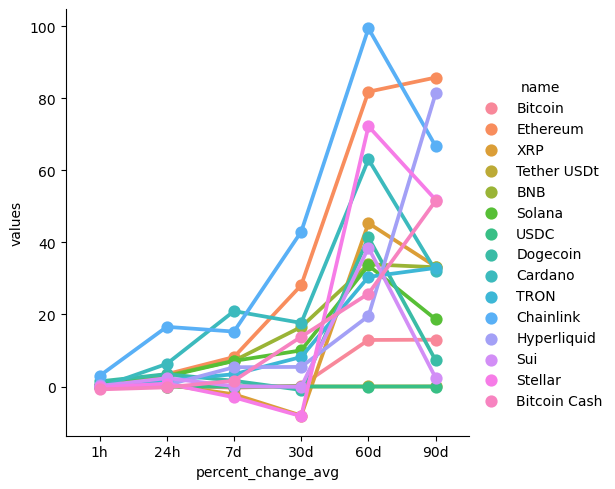

In [117]:
sns.catplot(data = df7, x = 'percent_change_avg', y = 'values', hue = 'name', kind = 'point')

In [123]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Solana'")
df8

name  quote.USD.price                  timestamp
5  Solana           193.91 2025-08-17 17:03:26.393686
5  Solana           194.64 2025-08-17 17:33:40.775834
5  Solana           194.61 2025-08-17 17:34:41.429519
5  Solana           194.61 2025-08-17 17:35:41.961577
5  Solana           194.71 2025-08-17 17:36:42.580677

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

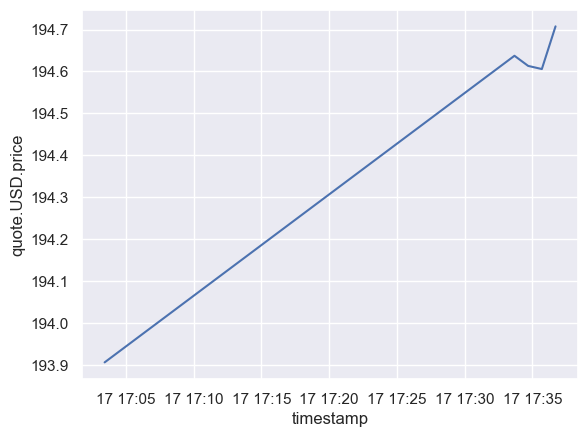

In [125]:
sns.set_theme(style = "darkgrid")

sns.lineplot(data = df8, x = 'timestamp', y = 'quote.USD.price')